# Exploratory Data Analysis (EDA)

- Perform univariate and bivariate analysis
- Visualize trends and patterns (line, histogram, scatter, etc.)
- Analyze correlations between different features
- Document findings and form hypotheses about the factors influencing betting outcomes



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the Data

In [4]:
train = pd.read_csv("vct_data/train_preprocessed.csv")
test = pd.read_csv("vct_data/test_preprocessed.csv")

# Combine train and test data
vct_data = pd.concat([train, test], ignore_index=True)

## Dataset Overview

In [5]:
# Check first few rows
vct_data.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1.0,0.0,Furious Gaming,13,7,6.0,0.0,41.883333,0.990122,186.0,60.0,76.0,22.0,-16.0,0.699855,119.6,0.250,10.0,10.0,0.0,0.990134,218.4,76.0,60.0,25.0,16.0,0.699858,132.8,0.190,10.0,10.0,0.0,17455.584114,8510.17329,Full buy: 20k+,17455.711283,8510.381277,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.517956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.51867,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,1.078947,0.350000,0.500000,0.0,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.650000,0.500000,0.0,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559545,0.534095,0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6.0,0.0,Leviatán,7,6,1.0,0.0,41.883333,0.990122,218.4,76.0,60.0,25.0,16.0,0.699855,132.8,0.190,10.0,10.0,0.0,0.990134,186.0,60.0,76.0,22.0,-16.0,0.699858,119.6,0.250,10.0,10.0,0.0,17455

In [4]:
# View dataset shape
rows, cols = vct_data.shape

print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 50594
Columns: 148


In [5]:
# Show summary statistics
vct_data.describe()

,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner
count,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.00000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.00000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.00000

In [6]:
# Determine which columns have missing values
missing_values = vct_data.isnull().sum()

if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found.")

No missing values found.


In [7]:
# Check for duplicates
duplicates = vct_data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


## Univariate Analysis

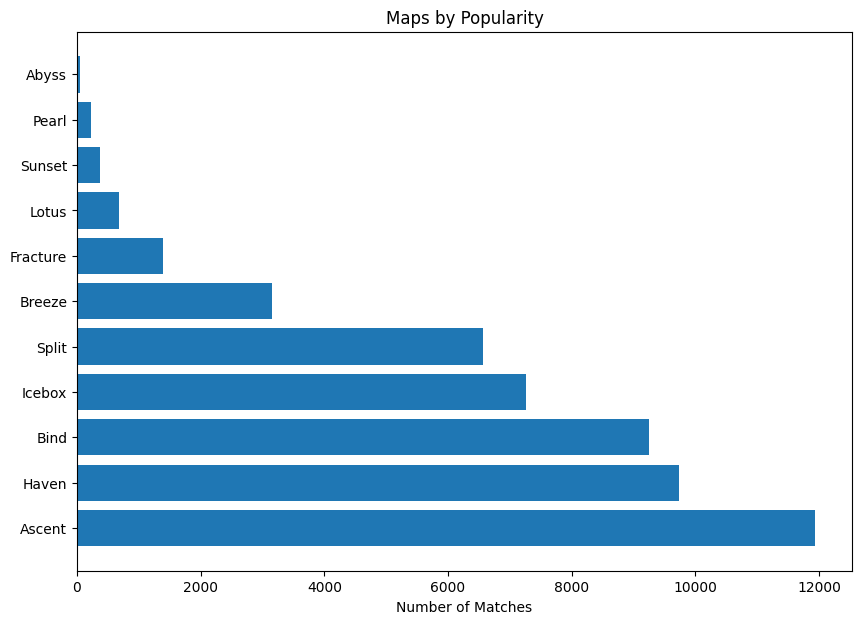

In [8]:
map_counts = vct_data['Map'].value_counts()

most_common_maps = map_counts.nlargest(11)

plt.figure(figsize=(10, 7))  
plt.barh(most_common_maps.index, most_common_maps.values)
plt.xlabel('Number of Matches') 
plt.title('Maps by Popularity')
plt.show()

The bar graph reveals that Ascent is the most popular map, followed by Haven, Bind, Icebox, and Split. These maps are preferred by players for their layouts and strategies they developed for these certain maps. Conversely, Abyss is the least played (but this is due to it just being released this 2024), followed by Pearl, Sunset, Lotus, Fracture, and Breeze. This pattern suggests varying levels of player comfort and preference in map selection.


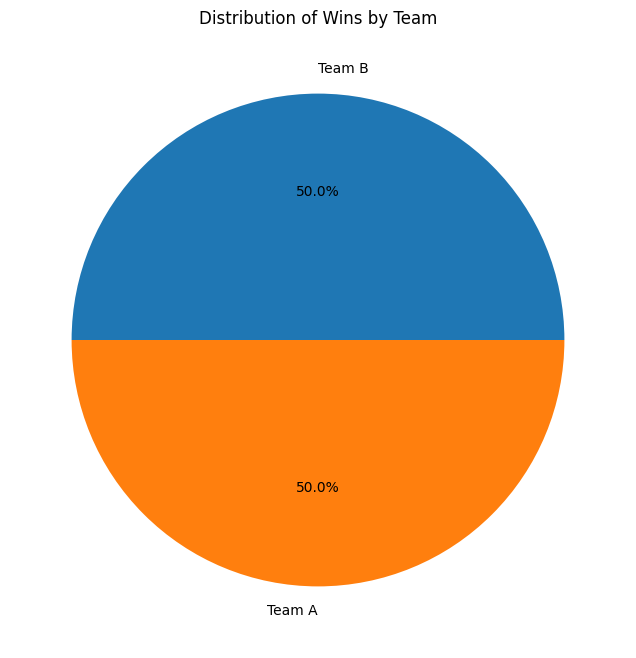

In [10]:
vct_data['Winner'] = vct_data['Winner'].map({1: 'Team A', 0: 'Team B'})
winner_counts = vct_data['Winner'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Wins by Team')
plt.show()

The pie chart illustrates the distribution of wins among the teams in the `Winner` column, which is the prediction target. The 50-50 distribution in the pie chart indicates that there is no class imbalance in the dataset. This is desirable situation for training the model because it can help prevent the model from becoming biased towards one class over the other.  

## Bivariate Analysis

In [8]:
import pandas as pd

# Select only Team A columns
team_a_stats = [
    "Team A", 
    "Team A H2H Win %",
    "Team A Tournament Win %",
    "Recent Win %_TeamA",
    "Team A Map Win %",
    "Round Win %_RollAvg_TeamA",
    "Attacker Win %_RollAvg_TeamA",
    "Defender Win %_RollAvg_TeamA",
    "Overtime Win %_RollAvg_TeamA",
    "Rating_RollAvg_TeamA", 
    "Average Combat Score_RollAvg_TeamA", 
    "Average Damage Per Round_RollAvg_TeamA", 
    "KDA_RollAvg_TeamA",
    "Kill, Assist, Trade, Survive %_RollAvg_TeamA", 
    "First Blood %_RollAvg_TeamA",
    "Headshot %_RollAvg_TeamA", 
    "Clutches_RollAvg_TeamA", 
    "Econ_RollAvg_TeamA",
    "Winner"
]

team_stats = vct_data[team_a_stats]

# Replace "Team A" with "Team" and remove "_TeamA" suffix
team_stats.columns = team_stats.columns.str.replace("Team A", "Team").str.replace("_TeamA", "")

team_stats.head()


,Team,Team H2H Win %,Team Tournament Win %,Recent Win %,Team Map Win %,Round Win %_RollAvg,Attacker Win %_RollAvg,Defender Win %_RollAvg,Overtime Win %_RollAvg,Rating_RollAvg,Average Combat Score_RollAvg,Average Damage Per Round_RollAvg,KDA_RollAvg,"Kill, Assist, Trade, Survive %_RollAvg",First Blood %_RollAvg,Headshot %_RollAvg,Clutches_RollAvg,Econ_RollAvg,Winner
0,Leviatán,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0
1,Furious Gaming,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,1
2,Leviatán,0.0,0.0,0.0,0.0,0.35,0.500,0.125,0.0,0.990122,186.0,119.6,1.078947,0.699855,0.5,0.25,0.0,53.517956,0
3,Furious Gaming,1.0,1.0,1.0,0.0,0.65,0.875,0.500,0.0,0.990122,218.4,132.8,1.683333,0.699855,0.5,0.19,0.0,53.517956,1
4,Procyon Team,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0


## Patterns and Insights

In [12]:
teamA = vct_data[['Team A', 'Kills_TeamA', 'Elimination_TeamA','Detonated_TeamA','Defused_TeamA','Time Expiry (Failed to Plant)_TeamA','Team A Attacker Score','Team A Defender Score','Average Combat Score_TeamA','Kill, Assist, Trade, Survive %_TeamA','Headshot %_TeamA']].rename(columns={'Team A': 'Team', 'Kills_TeamA': 'Kills','Elimination_TeamA':'Elimination','Detonated_TeamA':'Detonated','Defused_TeamA':'Defused','Time Expiry (Failed to Plant)_TeamA':'Time Expiry','Team A Attacker Score':'Attacker Score','Team A Defender Score':'Defender Score','Average Combat Score_TeamA':'ACS','Kill, Assist, Trade, Survive %_TeamA':'KAST%','Headshot %_TeamA':'Headshot%'})
teamB = vct_data[['Team B', 'Kills_TeamB', 'Elimination_TeamB','Detonated_TeamB','Defused_TeamB','Time Expiry (Failed to Plant)_TeamB','Team B Attacker Score','Team B Defender Score','Average Combat Score_TeamB','Kill, Assist, Trade, Survive %_TeamB','Headshot %_TeamB']].rename(columns={'Team B': 'Team', 'Kills_TeamB': 'Kills','Elimination_TeamB':'Elimination','Detonated_TeamB':'Detonated','Defused_TeamB':'Defused','Time Expiry (Failed to Plant)_TeamB':'Time Expiry','Team B Attacker Score':'Attacker Score','Team B Defender Score':'Defender Score','Average Combat Score_TeamB':'ACS','Kill, Assist, Trade, Survive %_TeamB':'KAST%','Headshot %_TeamB':'Headshot%'})
eda = pd.concat([teamA, teamB])

def plot_top_teams(data, column, title, xlabel):
    top_teams = data.groupby('Team')[column].mean().reset_index().sort_values(by=column, ascending=False).head(10)
    sns.barplot(x=column, y='Team', data=top_teams, palette='rocket', hue='Team', legend=False)
    plt.xlabel(xlabel)
    plt.ylabel('Team Name')
    plt.title(title)
    plt.show()

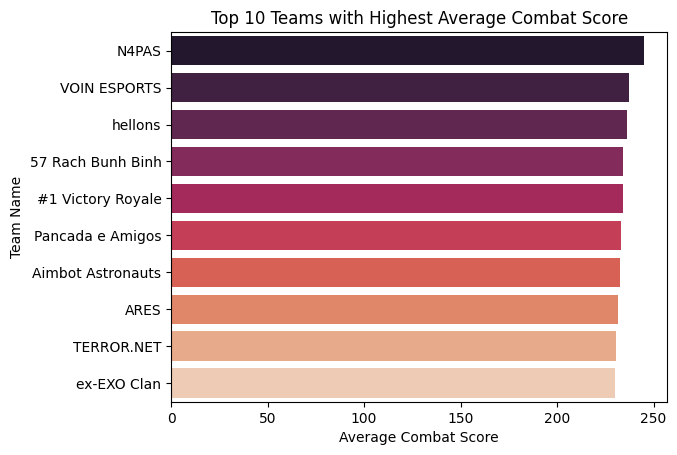

In [13]:
plot_top_teams(eda, 'ACS', 'Top 10 Teams with Highest Average Combat Score', 'Average Combat Score')

These are the teams that has the highest average combat score. The graph implies the players' skills in terms of damage and kills, which is a crucial factor in determining the winner of a match. Although N4PAS takes the lead, the average scores of the teams are relatively close to each other, showing only minor differences in performance.

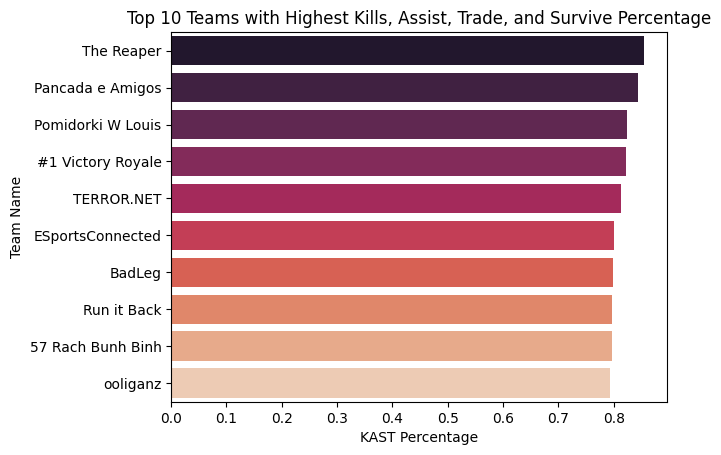

In [14]:
plot_top_teams(eda, 'KAST%', 'Top 10 Teams with Highest Kills, Assist, Trade, and Survive Percentage', 'KAST Percentage')

These are the teams with the highest KAST percentages, showing consistency in their performances. They excel in getting kills, assists, surviving, and trading effectively. The team with highest percentage exceeding 80%, is The Reaper. The teams have percentages that are closely aligned, indicating similar levels of performance.

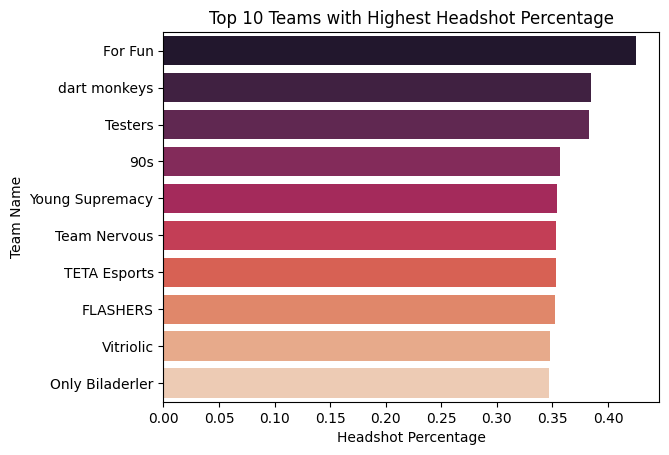

In [15]:
plot_top_teams(eda, 'Headshot%', 'Top 10 Teams with Highest Headshot Percentage', 'Headshot Percentage')

These teams demonstrated precise aiming skills, achieving more headshots than their competitors. The percentage of 30%-50% reflects their exceptional accuracy and effectiveness in securing eliminations. For Fun takes the lead with above 40% headshot percentage.

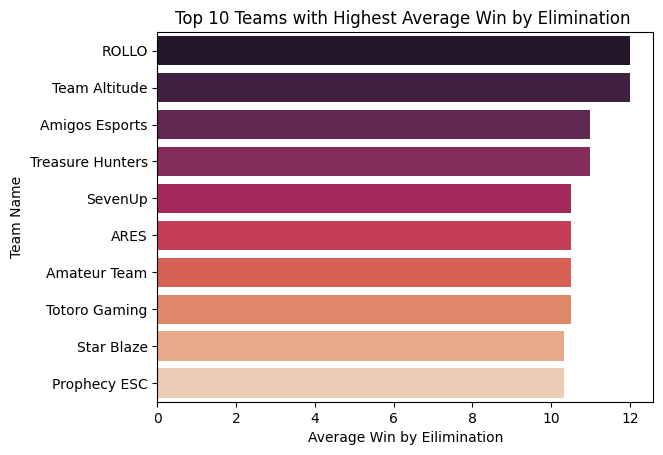

In [17]:
plot_top_teams(eda, 'Elimination', 'Top 10 Teams with Highest Average Win by Elimination ', 'Average Win by Eilimination')

The graph reveals that the teams with the highest average wins by elimination all have scores above 10, demonstrating their strong elimination skills. Leading teams are ROLLO and Team Altitude.

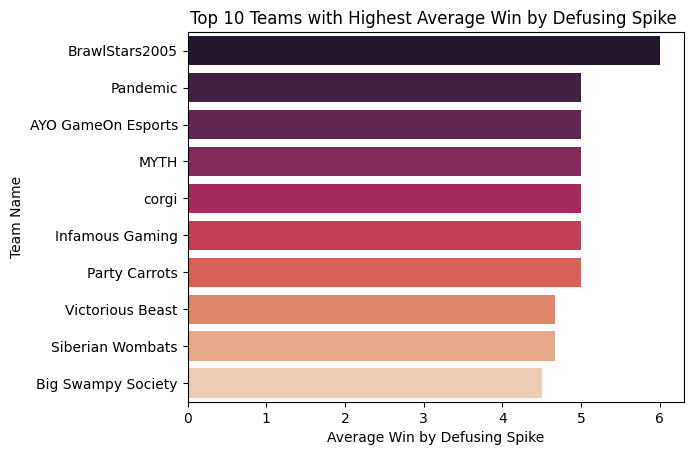

In [18]:
plot_top_teams(eda, 'Defused', 'Top 10 Teams with Highest Average Win by Defusing Spike ', 'Average Win by Defusing Spike')

Another crucial skill that can influence match outcomes is the ability to defuse the spike. Teams demonstrating proficiency in this area are BrawlStars2005, leading with an impressive average of 6 wins per map, game, and match.

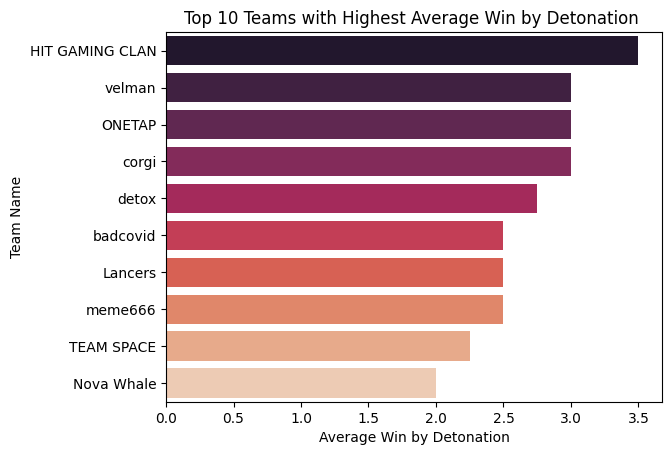

In [19]:
plot_top_teams(eda, 'Detonated', 'Top 10 Teams with Highest Average Win by Detonation ', 'Average Win by Detonation')

The graph indicates that these teams experienced the highest frequency of wins in detonating the spike. Hit Gaming Plan leads with a score of 3.5. The following teams' scores ranges from an average of 2 to 3 wins per map, game, and match.

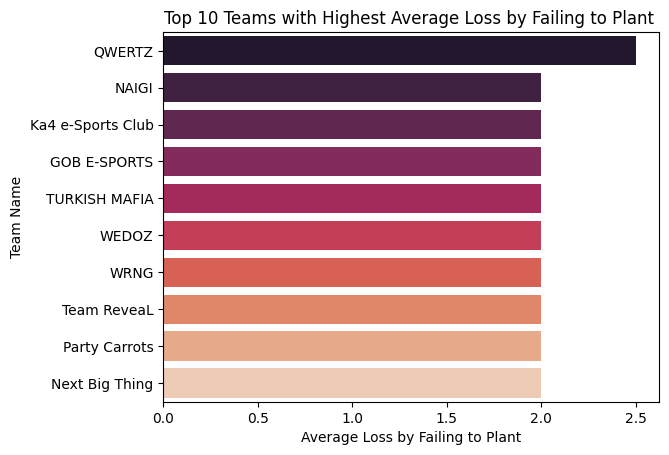

In [20]:
plot_top_teams(eda, 'Time Expiry', 'Top 10 Teams with Highest Average Loss by Failing to Plant ', 'Average Loss by Failing to Plant')

The graph suggests that these teams had the most frequent issues with spike planting, leading to higher losses. QWERTZ leads with a score of 2.5, and the following teams scored an average of 2 losses per map, game, and match.

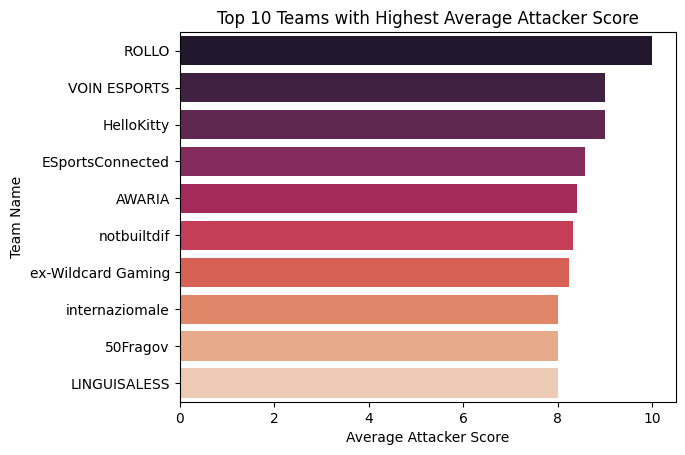

In [21]:
plot_top_teams(eda, 'Attacker Score', 'Top 10 Teams with Highest Average Attacker Score', 'Average Attacker Score')

The bar graph showcases the teams with the highest average attacker scores, reflecting their skills in attacking strategies. The leading teams have achieved average scores between 8 and 10 per map, game, and match, showing their effectiveness in gameplay.

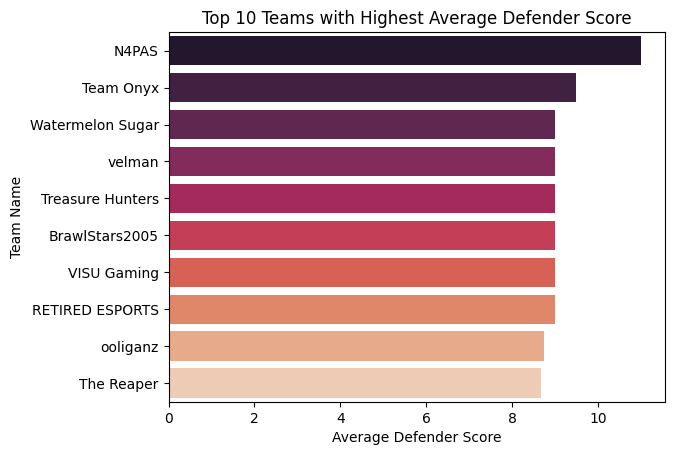

In [22]:
plot_top_teams(eda, 'Defender Score', 'Top 10 Teams with Highest Average Defender Score', 'Average Defender Score')

The bar graph illustrates the teams with the highest average defender scores, highlighting their effectiveness in defensive play and overall survivability. N4Pas is leading with Team Onyx.

# CHECK THESE PLOTS

### Performance Metrics


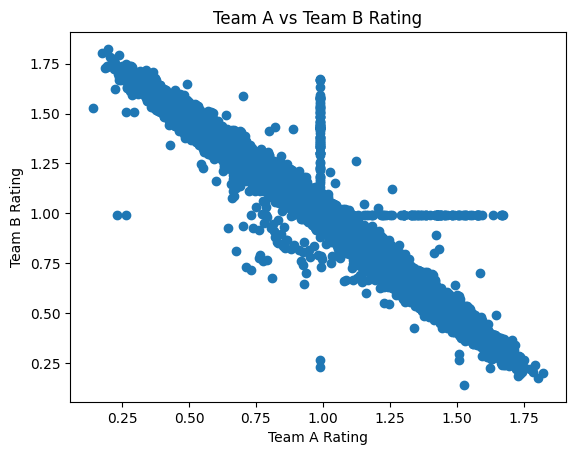

In [23]:
plt.scatter(vct_data["Rating_TeamA"], vct_data["Rating_TeamB" ])

plt.xlabel("Team A Rating")
plt.ylabel("Team B Rating")
plt.title("Team A vs Team B Rating") 

plt.show()

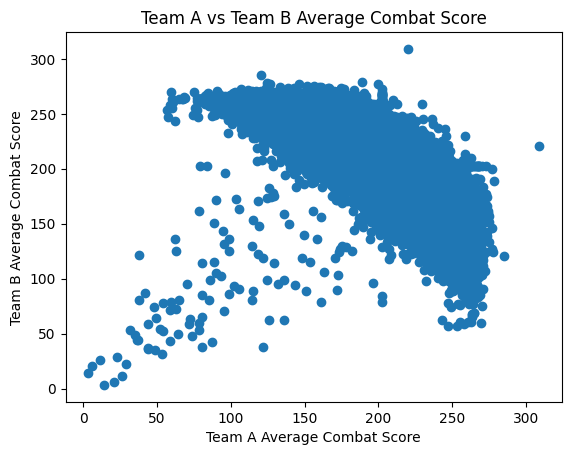

In [25]:
plt.scatter(vct_data["Average Combat Score_TeamA"], vct_data["Average Combat Score_TeamB" ])
plt.xlabel("Team A Average Combat Score")
plt.ylabel("Team B Average Combat Score")
plt.title("Team A vs Team B Average Combat Score")
plt.show()

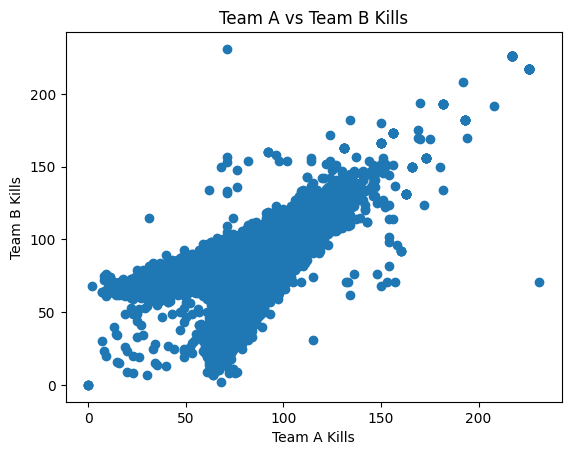

In [27]:
plt.scatter(vct_data["Kills_TeamA"], vct_data["Kills_TeamB" ])
plt.xlabel("Team A Kills")
plt.ylabel("Team B Kills")
plt.title("Team A vs Team B Kills")
plt.show()

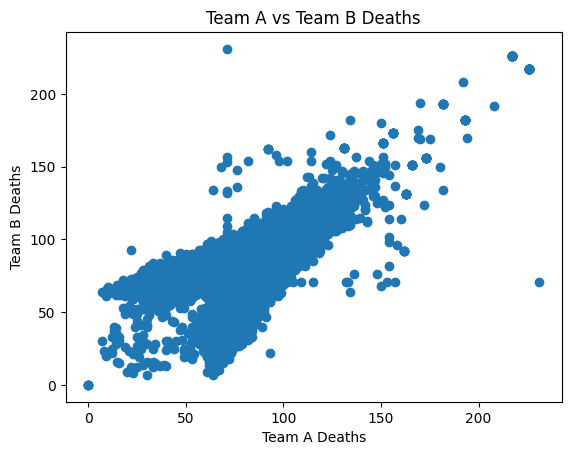

In [29]:
plt.scatter(vct_data["Deaths_TeamA"], vct_data["Deaths_TeamB" ])
plt.xlabel("Team A Deaths")
plt.ylabel("Team B Deaths")
plt.title("Team A vs Team B Deaths")
plt.show()

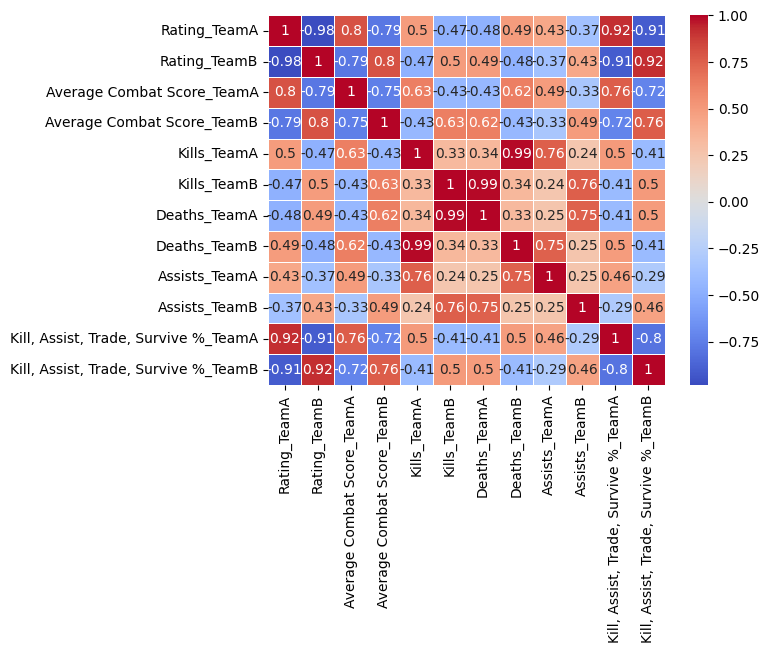

In [31]:
# Selecting the relevant columns from your DataFrame
cols_to_plot = ["Rating_TeamA","Rating_TeamB","Average Combat Score_TeamA","Average Combat Score_TeamB", "Kills_TeamA", "Kills_TeamB", 
                "Deaths_TeamA", "Deaths_TeamB", "Assists_TeamA", "Assists_TeamB", "Kill, Assist, Trade, Survive %_TeamA", 
                "Kill, Assist, Trade, Survive %_TeamB"]
selected = vct_data[cols_to_plot]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected.corr()

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

### Economy and Strategy

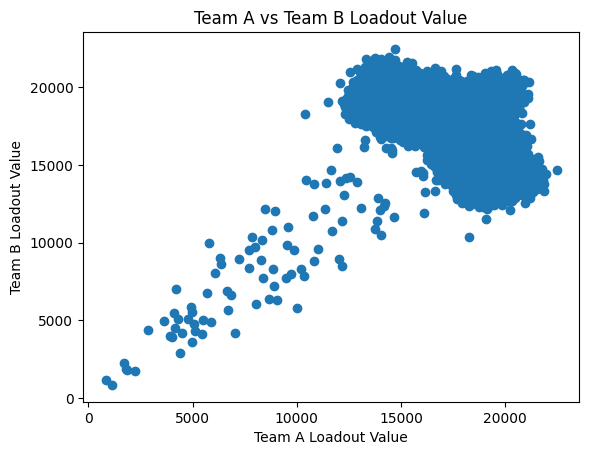

In [32]:
plt.scatter(vct_data["Loadout Value_TeamA"], vct_data["Loadout Value_TeamB" ])
plt.xlabel("Team A Loadout Value")
plt.ylabel("Team B Loadout Value")
plt.title("Team A vs Team B Loadout Value")
plt.show()

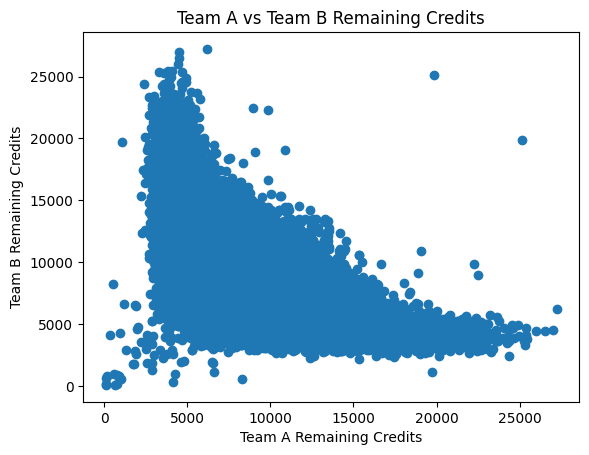

In [34]:
plt.scatter(vct_data["Remaining Credits_TeamA"], vct_data["Remaining Credits_TeamB" ])
plt.xlabel("Team A Remaining Credits")
plt.ylabel("Team B Remaining Credits")
plt.title("Team A vs Team B Remaining Credits")
plt.show()

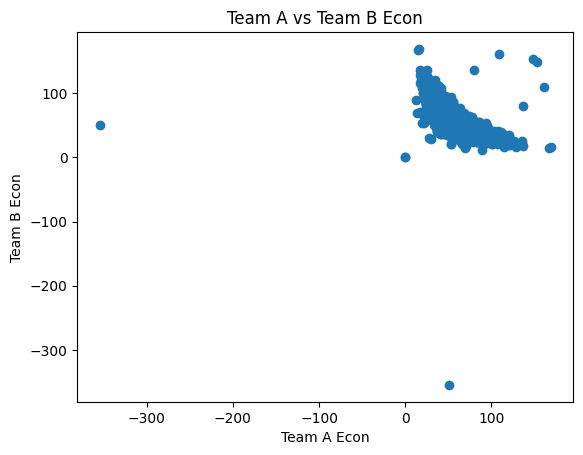

In [36]:
plt.scatter(vct_data["Econ_TeamA"], vct_data["Econ_TeamB" ])
plt.xlabel("Team A Econ")
plt.ylabel("Team B Econ")
plt.title("Team A vs Team B Econ")
plt.show()

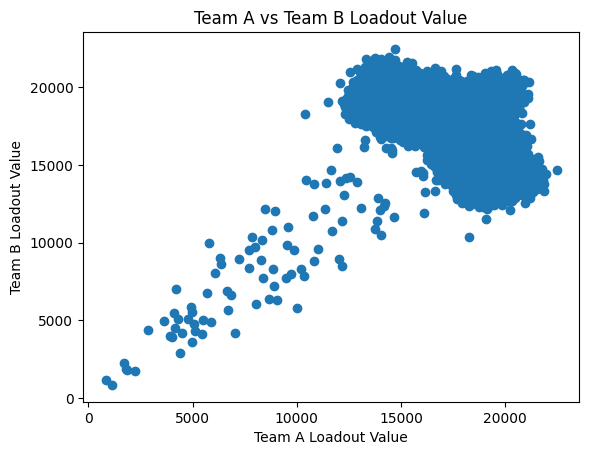

In [38]:
plt.scatter(vct_data["Loadout Value_TeamA"], vct_data["Loadout Value_TeamB" ])
plt.xlabel("Team A Loadout Value")
plt.ylabel("Team B Loadout Value")
plt.title("Team A vs Team B Loadout Value")
plt.show()

### Map and Side Performance


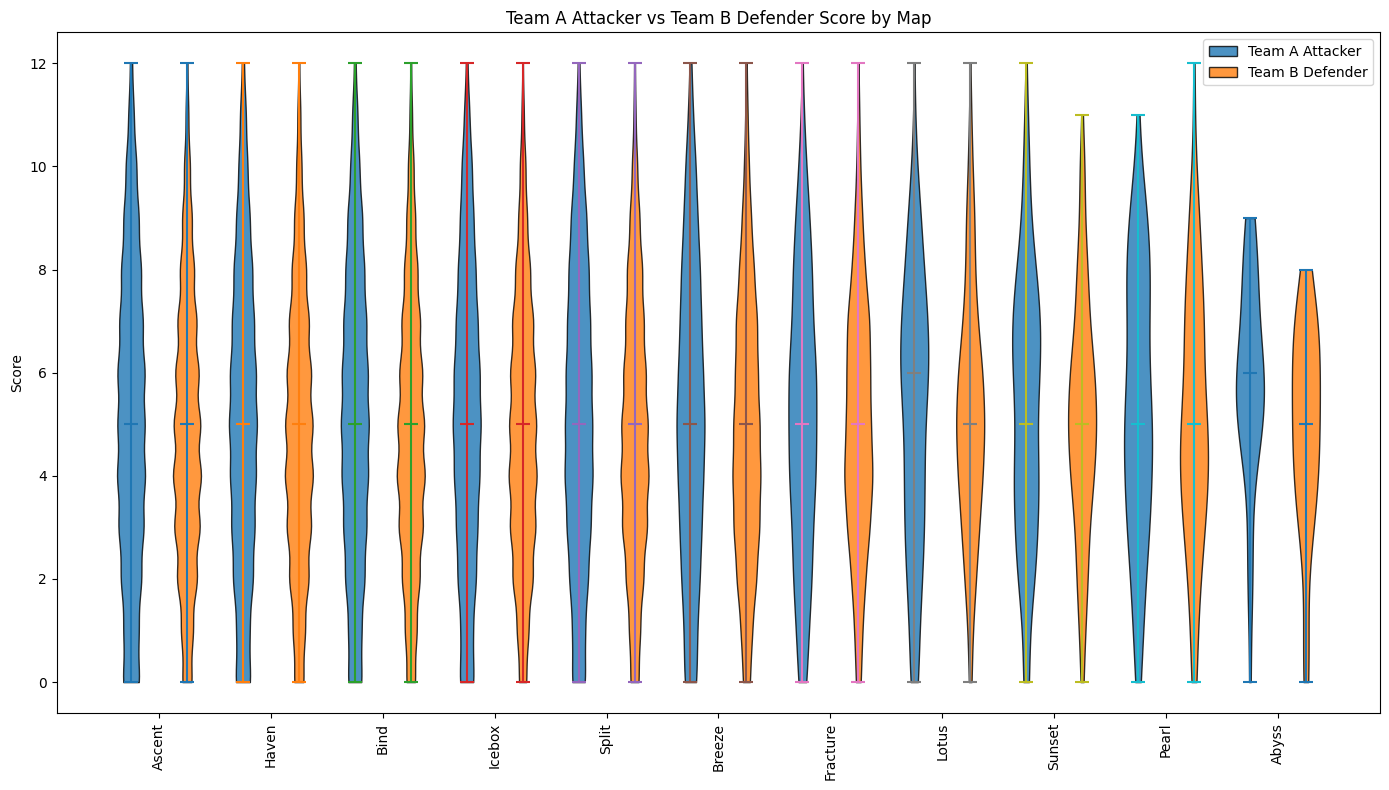

In [40]:
# Define the list of maps
maps = ["Ascent", "Haven", "Bind", "Icebox", "Split", "Breeze", "Fracture", "Lotus", "Sunset", "Pearl", "Abyss"]

# Create a figure
plt.figure(figsize=(14, 8))

# Prepare colors for Team A (Attacker) and Team B (Defender)
colors = ['#1f77b4', '#ff7f0e']  # Blue for Team A, Orange for Team B

# Prepare data for each map
data = []
for map_name in maps:
    team_a_attacker_scores = vct_data[vct_data["Map"] == map_name]["Team A Attacker Score"]
    team_b_defender_scores = vct_data[vct_data["Map"] == map_name]["Team B Defender Score"]
    # Append scores as a pair for each map
    data.append([team_a_attacker_scores, team_b_defender_scores])

# Create a grouped violin plot for each map
for i, (team_a, team_b) in enumerate(data):
    positions = [2 * i + 1, 2 * i + 2]  # Positions to plot Team A and Team B side by side
    parts = plt.violinplot([team_a, team_b], positions=positions, showmeans=False, showmedians=True)

    # Set different colors for Team A and Team B violins
    for j, pc in enumerate(parts['bodies']):
        if j % 2 == 0:
            pc.set_facecolor(colors[0])  # Color for Team A (Attacker)
        else:
            pc.set_facecolor(colors[1])  # Color for Team B (Defender)
        pc.set_edgecolor('black')  # Add black border for clarity
        pc.set_alpha(0.8)  # Make the violins slightly transparent

# Set x-ticks and labels
positions = [2 * i + 1.5 for i in range(len(maps))]  # Midpoints for the x-ticks
labels = [f"{map_name}" for map_name in maps]  # Map names as labels
plt.xticks(positions, labels, rotation=90)

# Add a legend to distinguish teams
plt.legend(['Team A Attacker', 'Team B Defender'], loc='upper right')

# Set axis labels and title
plt.ylabel("Score")
plt.title("Team A Attacker vs Team B Defender Score by Map")

# Show the plot
plt.tight_layout()
plt.show()


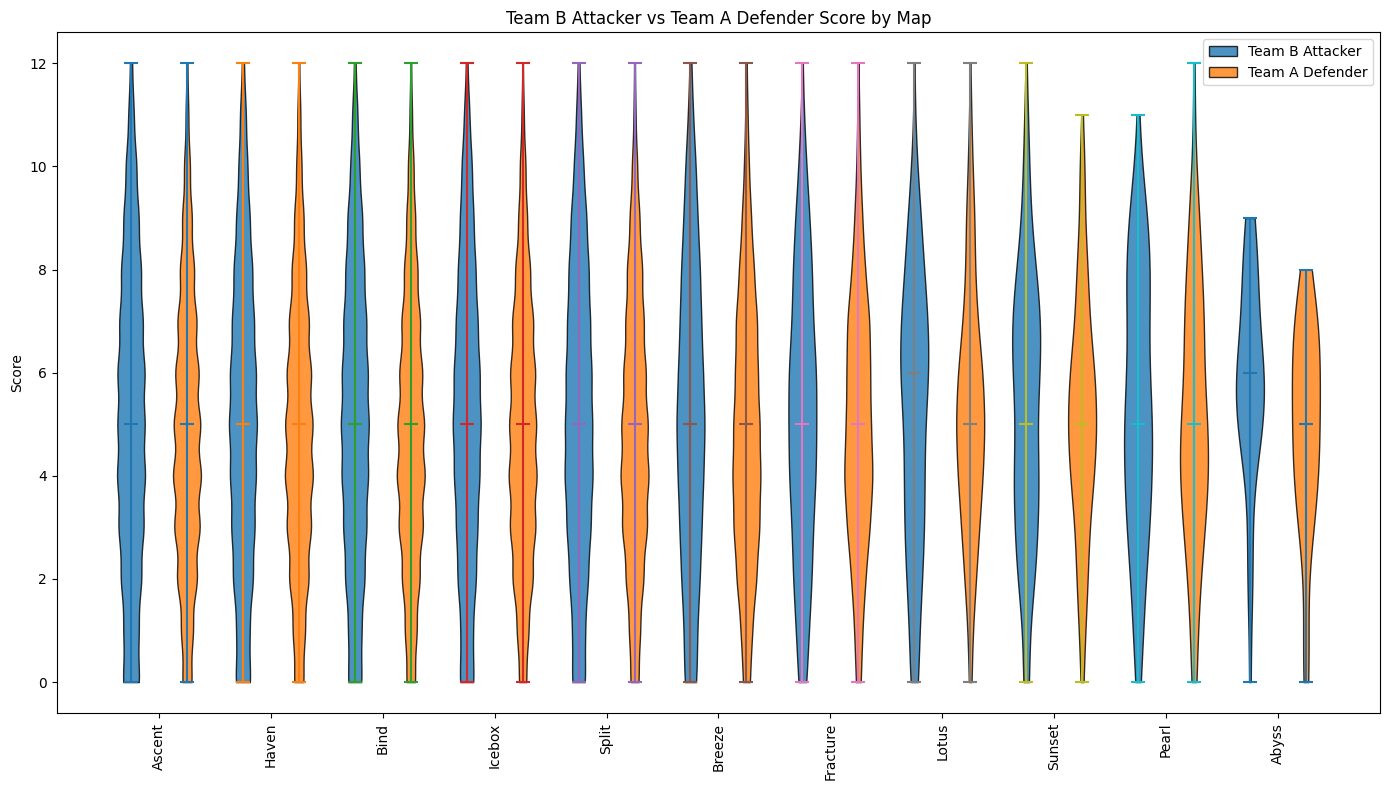

In [41]:
# Define the list of maps
maps = ["Ascent", "Haven", "Bind", "Icebox", "Split", "Breeze", "Fracture", "Lotus", "Sunset", "Pearl", "Abyss"]

# Create a figure
plt.figure(figsize=(14, 8))

# Prepare colors for Team A (Attacker) and Team B (Defender)
colors = ['#1f77b4', '#ff7f0e']  # Blue for Team A, Orange for Team B

# Prepare data for each map
data = []
for map_name in maps:
    team_b_attacker_scores = vct_data[vct_data["Map"] == map_name]["Team B Attacker Score"]
    team_a_defender_scores = vct_data[vct_data["Map"] == map_name]["Team A Defender Score"]
    # Append scores as a pair for each map
    data.append([team_b_attacker_scores, team_a_defender_scores])

# Create a grouped violin plot for each map
for i, (team_b, team_a) in enumerate(data):
    positions = [2 * i + 1, 2 * i + 2]  # Positions to plot Team A and Team B side by side
    parts = plt.violinplot([team_b, team_a], positions=positions, showmeans=False, showmedians=True)

    # Set different colors for Team A and Team B violins
    for j, pc in enumerate(parts['bodies']):
        if j % 2 == 0:
            pc.set_facecolor(colors[0])  # Color for Team B (Attacker)
        else:
            pc.set_facecolor(colors[1])  # Color for Team A (Defender)
        pc.set_edgecolor('black')  # Add black border for clarity
        pc.set_alpha(0.8)  # Make the violins slightly transparent

# Set x-ticks and labels
positions = [2 * i + 1.5 for i in range(len(maps))]  # Midpoints for the x-ticks
labels = [f"{map_name}" for map_name in maps]  # Map names as labels
plt.xticks(positions, labels, rotation=90)

# Add a legend to distinguish teams
plt.legend(['Team B Attacker', 'Team A Defender'], loc='upper right')

# Set axis labels and title
plt.ylabel("Score")
plt.title("Team B Attacker vs Team A Defender Score by Map")

# Show the plot
plt.tight_layout()
plt.show()


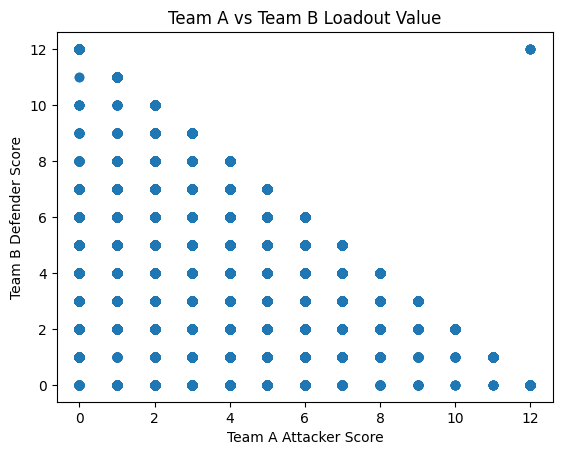

In [42]:
plt.scatter(vct_data["Team A Attacker Score"], vct_data["Team B Defender Score" ])
plt.xlabel("Team A Attacker Score")
plt.ylabel("Team B Defender Score")
plt.title("Team A vs Team B Loadout Value")
plt.show()

### Clutch Situation and Multi-Kills

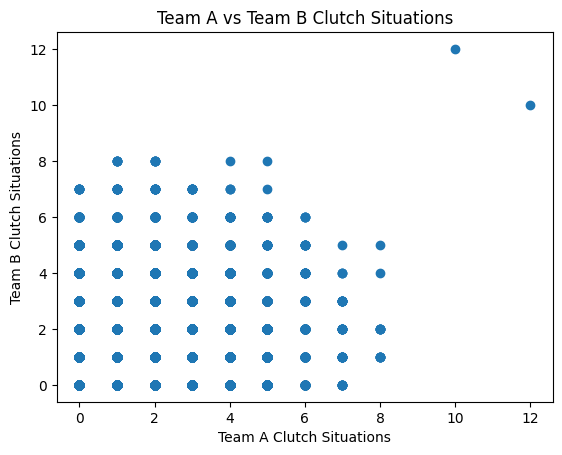

In [43]:
sum_teamA = vct_data[["1v1_TeamA", "1v2_TeamA", "1v3_TeamA", "1v4_TeamA", "1v5_TeamA"]].sum(axis=1)
sum_teamB = vct_data[["1v1_TeamB", "1v2_TeamB", "1v3_TeamB", "1v4_TeamB", "1v5_TeamB"]].sum(axis=1)

plt.scatter(sum_teamA, sum_teamB)
plt.xlabel("Team A Clutch Situations")
plt.ylabel("Team B Clutch Situations")
plt.title("Team A vs Team B Clutch Situations")
plt.show()



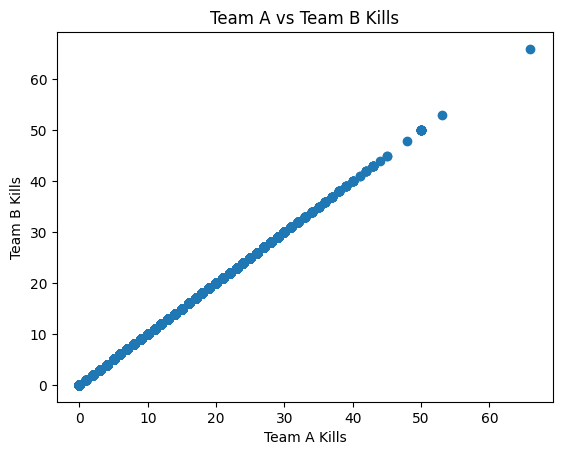

In [44]:
sum_teamA = vct_data[["2k_TeamA", "3k_TeamA", "4k_TeamA", "5k_TeamA"]].sum(axis=1)
sum_teamB = vct_data[["2k_TeamA", "3k_TeamA", "4k_TeamA", "5k_TeamA"]].sum(axis=1)

plt.scatter(sum_teamA, sum_teamB)
plt.xlabel("Team A Kills")
plt.ylabel("Team B Kills")
plt.title("Team A vs Team B Kills")
plt.show()


### First Blood and KAST

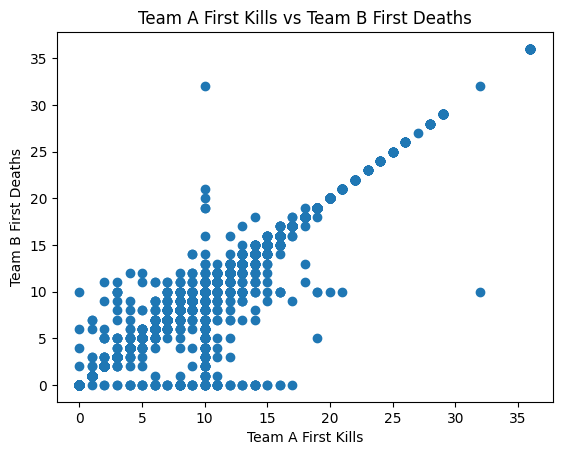

In [45]:
plt.scatter(vct_data["First Kills_TeamA"], vct_data["First Deaths_TeamB" ])
plt.xlabel("Team A First Kills")
plt.ylabel("Team B First Deaths")
plt.title("Team A First Kills vs Team B First Deaths")
plt.show()

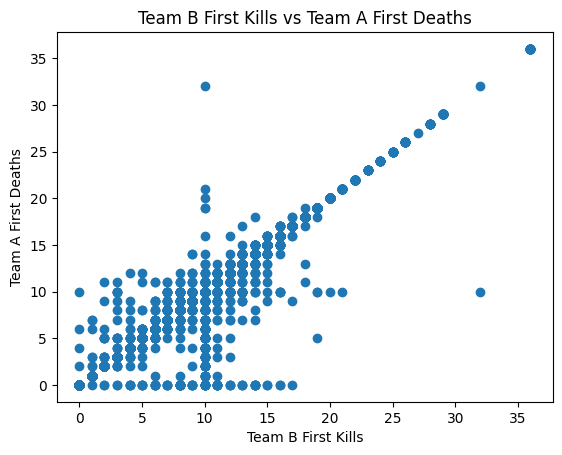

In [46]:
plt.scatter(vct_data["First Kills_TeamB"], vct_data["First Deaths_TeamA" ])
plt.xlabel("Team B First Kills")
plt.ylabel("Team A First Deaths")
plt.title("Team B First Kills vs Team A First Deaths")
plt.show()

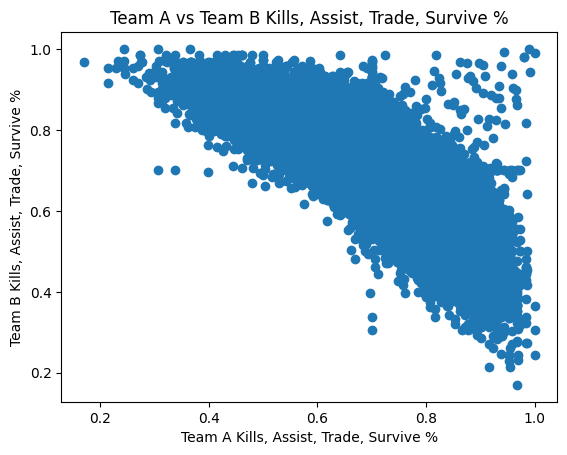

In [47]:
plt.scatter(vct_data["Kill, Assist, Trade, Survive %_TeamA" ], vct_data["Kill, Assist, Trade, Survive %_TeamB"])
plt.xlabel("Team A Kills, Assist, Trade, Survive %")
plt.ylabel("Team B Kills, Assist, Trade, Survive %")
plt.title("Team A vs Team B Kills, Assist, Trade, Survive %")
plt.show()

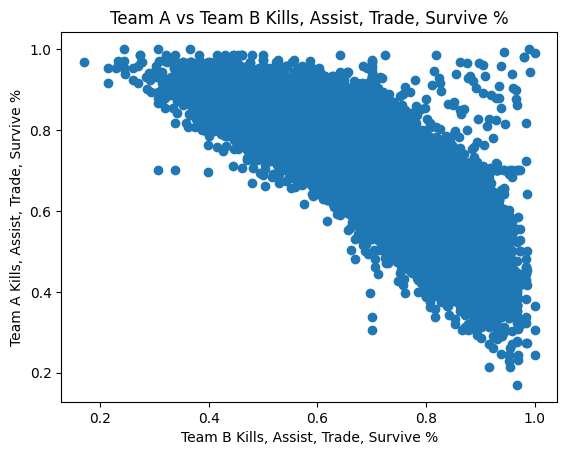

In [48]:
plt.scatter(vct_data["Kill, Assist, Trade, Survive %_TeamB" ], vct_data["Kill, Assist, Trade, Survive %_TeamA"])
plt.xlabel("Team B Kills, Assist, Trade, Survive %")
plt.ylabel("Team A Kills, Assist, Trade, Survive %")
plt.title("Team A vs Team B Kills, Assist, Trade, Survive %")
plt.show()

### Round Outcomes

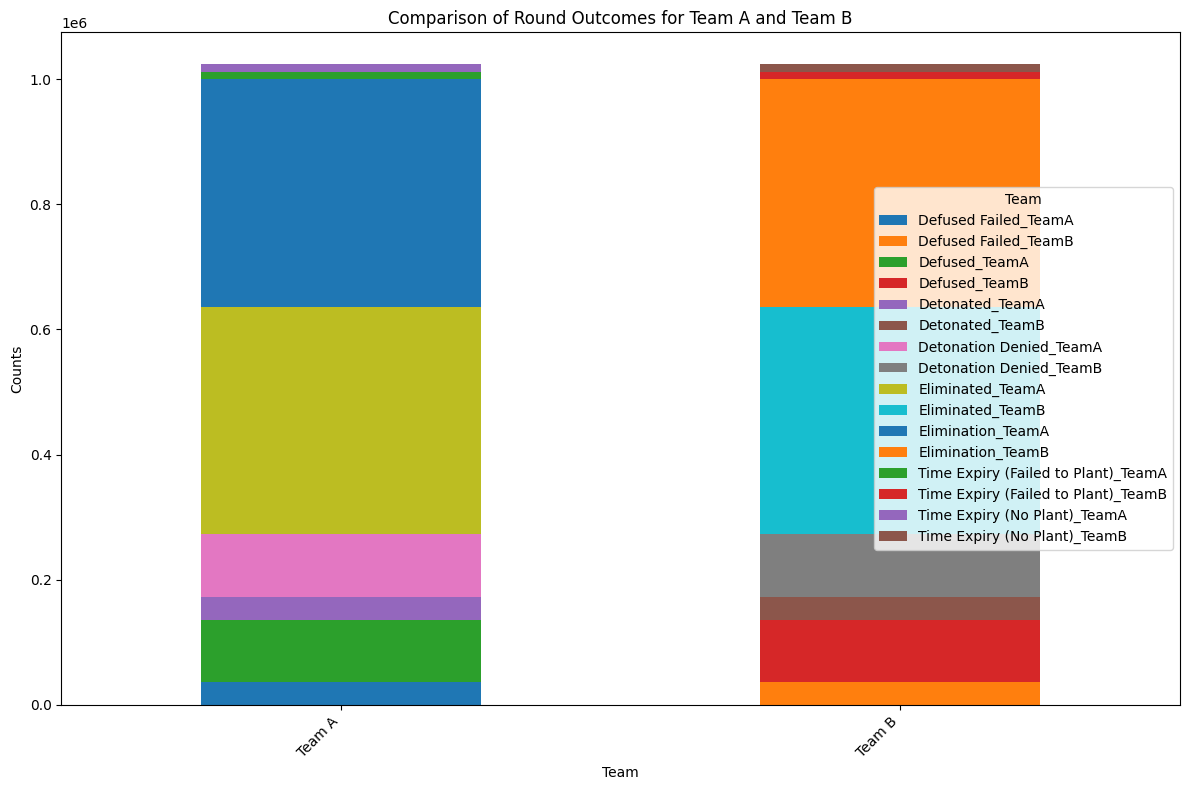

In [49]:
data = [
    "Elimination_TeamA",
    "Detonated_TeamA",
    "Defused_TeamA",
    "Time Expiry (No Plant)_TeamA",
    "Eliminated_TeamA",
    "Defused Failed_TeamA",
    "Detonation Denied_TeamA",
    "Time Expiry (Failed to Plant)_TeamA",
    "Elimination_TeamB",
    "Detonated_TeamB",
    "Defused_TeamB",
    "Time Expiry (No Plant)_TeamB",
    "Eliminated_TeamB",
    "Defused Failed_TeamB",
    "Detonation Denied_TeamB",
    "Time Expiry (Failed to Plant)_TeamB"
]

# Select relevant columns from the dataframe
df = vct_data[data]

# Summarize data for Team A and Team B
teamA_columns = [
    "Elimination_TeamA",
    "Detonated_TeamA",
    "Defused_TeamA",
    "Time Expiry (No Plant)_TeamA",
    "Eliminated_TeamA",
    "Defused Failed_TeamA",
    "Detonation Denied_TeamA",
    "Time Expiry (Failed to Plant)_TeamA"
]

teamB_columns = [
    "Elimination_TeamB",
    "Detonated_TeamB",
    "Defused_TeamB",
    "Time Expiry (No Plant)_TeamB",
    "Eliminated_TeamB",
    "Defused Failed_TeamB",
    "Detonation Denied_TeamB",
    "Time Expiry (Failed to Plant)_TeamB"
]

# Aggregate data for each team
teamA_data = df[teamA_columns].sum()
teamB_data = df[teamB_columns].sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Team A': teamA_data,
    'Team B': teamB_data
}).T

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

plot_data.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Round Outcomes for Team A and Team B')
ax.legend(title='Team')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
